# Análisis de sentimientos de frases en Python
Es el cuarto día y seguimos desarrollando _machine learning_. Además vamos a graficar. Utilizaremos una nueva librería llamada `TextBlob` que procesa texto y hace un análisis de los sentimientos en él. Su enfoque se basa en un diccionario de palabras con valores asignados que determinan la __polaridad__ (qué tan positivo o negativo es el texto) y la __subjetividad__ (que tan subjetivo y personal es) del texto analizado.

A través de esta librería accedemos a modelos predefinidos. Se caracteriza por ser simple y nos ayudará a entender cómo funcionan los análisis de sentimiento de forma básica. El modelo funciona bien con el idioma inglés, así que analizaremos frases en ese idioma.

Ésta será una tarea de procesamiento de lenguaje natural (_NLP_ son sus siglas en inglés) supervisado. En las tareas de procesamiento de lenguaje natural interpretamos, manipulamos y comprendemos el lenguaje humano a través de computadoras. En la actualidad es fundamental. Es una de las herramientas principales de todo _chatbot_.

## Importación de las librerías que usaremos
Seguramente nunca faltará `pandas` en ninguno de estos 30 cuadernos. Además importaremos `seaborn` y `matplotlib` para graficar, y la ya mencionada `TextBlob`. 

In [1]:
# Librerías necesarias.
import pandas as pd
import seaborn as sns
from textblob import TextBlob
import matplotlib.pyplot as plt

## Creación de las frases
¿Recuerdas que `TextBlob` es un modelo sencillo? Es por esta razón que debemos usar frases claras, expresivas y en inglés o haremos que se confunda. Usaremos frases simples y emotivas que nuestro modelo pueda comprender y jugaremos con la subjetividad para ver las diferencias.

In [2]:
phrases = [
    "I love this movie, it's amazing. It´s one of the best movies I have seen.",
    "The acting was terrible and boring, a big disappointment.",
    "What an amazing and well-told story, the writting was majestic.",
    "I didn't like it at all, really bad. I was bored.",
    "Just an average film, nothing special. They are better movies about running.",
    "This book changed my life for the better. I´m a different person now."
]

## Aplicación del modelo
A continuación vamos a extraer la polaridad y la subjetividad.

In [3]:
# Extraemos polaridad y subjetividad.
data = [] # Crearemos una lista vacía para almacenar la frase, su polaridad y su subjetividad.

# Con un ciclo for iteraremos sobre cada frase para poderla analizar con `TextBlob`.
for phrase in phrases: # Ciclo for sobre la variable `phrases`
    analysis = TextBlob(phrase) # Almacenemos el modelo en una variable.
    data.append({
        "Phrase": phrase,
        "Short": f"Phrase {len(data) + 1}",   # Etiquetas cortas.
        "Polarity": analysis.sentiment.polarity,
        "Subjectivity": analysis.sentiment.subjectivity
    }) # Añadimos la información a la variable vacía.

Ya sólo nos queda crear un _DataFrame_ con toda la información para poder graficar.

In [4]:
# Convertir a DataFrame.
df = pd.DataFrame(data) # Les dije que usaríamos pandas.

## Gráfica y tabla con los resultados
Hay dos cosas que debemos saber para hacer una interpretación correcta.

- Los coeficientes de polaridad van de a 1 (sentimiento positivo) a -1 (sentimiento negativo).

- Los coeficientes de subjetividad van de 1 (subjetividad) a 0 (objetividad).

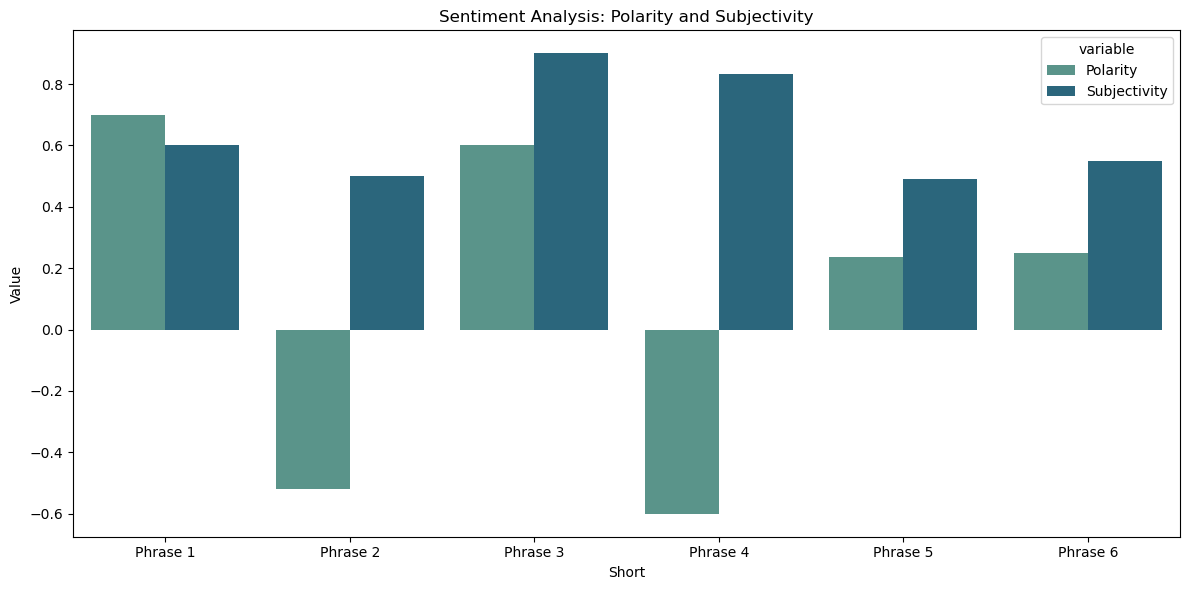

,Short,Phrase,Polarity,Subjectivity
0,Phrase 1,"I love this movie, it's amazing. It´s one of t...",0.700000,0.600000
1,Phrase 2,"The acting was terrible and boring, a big disa...",-0.520000,0.500000
2,Phrase 3,"What an amazing and well-told story, the writt...",0.600000,0.900000
3,Phrase 4,"I didn't like it at all, really bad. I was bored.",-0.600000,0.833333
4,Phrase 5,"Just an average film, nothing special. They ar...",0.235714,0.490476
5,Phrase 6,This book changed my life for the better. I´m ...,0.250000,0.550000


In [5]:
# Gráfica.
plt.figure(figsize=(12,6))
sns.barplot(
    data=df.melt(id_vars=['Phrase', 'Short'], value_vars=['Polarity', 'Subjectivity']),
    x='Short', y='value', hue='variable', palette='crest'
)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Value')
plt.title('Sentiment Analysis: Polarity and Subjectivity')
plt.tight_layout()
plt.show()

# Tabla con frases completas y resultados
display(df[["Short", "Phrase", "Polarity", "Subjectivity"]])

## Conclusiones 
Analizaremos cada frase, su naturaleza y resultados.

__1.__ _"I love this movie, it's amazing. It´s one of the best movies I have seen."_

Polaridad: 0.7 | Subjetividad: 0.6

Es una frase claramente positiva, expresa fuerte entusiasmo y juicio personal. La polaridad alta indica mucha positividad y la subjetividad alta indica opinión personal clara. Se utiliza un pronombre personal, probablemente eso la hace subjetiva para el modelo.

__2.__ _"The acting was terrible and boring, a big disappointment."_

Polaridad: -0.52 | Subjetividad: 0.5

Negativa, con palabras como "_terrible_", "_boring_" y "_disappointment_". La polaridad negativa refleja eso y la subjetividad indica que es juicio/opinión, aunque no incluye pronombres personales; tal vez por eso su subjetividad es menor a la de la primera frase.

__3.__ _"What an amazing and well-told story, the writting was majestic."_

Polaridad: 0.6 | Subjetividad: 0.9

Positiva y subjetiva; llena de adjetivos que resaltan opinión fuerte y emoción.

__4.__ _"I didn't like it at all, really bad. I was bored."_

Polaridad: -0.6 | Subjetividad: 0.83

Muy negativa y personal; las expresiones directas de disgusto bajan la polaridad y la subjetividad es alta por el énfasis en el aburrimiento.

__5.__ _"Just an average film, nothing special. They are better movies about running."_

Polaridad: 0.24 | Subjetividad: 0.49

Es levemente positiva y con una polaridad cerca de neutra; la subjetividad es menor, tal vez porque hay una comparación.

__6.__ _"This book changed my life for the better. I´m a different person now."_

Polaridad: 0.25 | Subjetividad: 0.55

El resultado es de polaridad positiva, pues destaca transformación personal y emoción. Es una frase muy subjetiva y emotiva si lo piensas bien, pero el modelo no la ve así. 

Como hemos podido comprobar en la última frase, el modelo interpreta incorrectamente frases que no utilicen adjetivos muy fuertes. Por otro lado, es sorprendente que en frases sin pronombres personales logre 'entender' que hay una opinión personal y subjetiva. Interesantes resultados.